In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import KNNImputer

In [3]:
sns.set(style='darkgrid')
color = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
# Load data
survey_results = pd.read_csv('./data/survey_results.csv')
questions = survey_results.iloc[0]
survey_results = survey_results.iloc[2:]
numeric_questions = ['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14','Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_1', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4', 'Q20_5', 'Q21_1', 'Q21_2', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27_1', 'Q28', 'Q30', 'Q31', 'Q32']
numeric_results = survey_results[numeric_questions]
# Fill missing results
knn = KNNImputer(n_neighbors=5)
numeric_results = knn.fit_transform(numeric_results)
numeric_results = numeric_results.astype(int)
# Standardize
numeric_results = preprocessing.scale(numeric_results, axis=0)

# Visualization

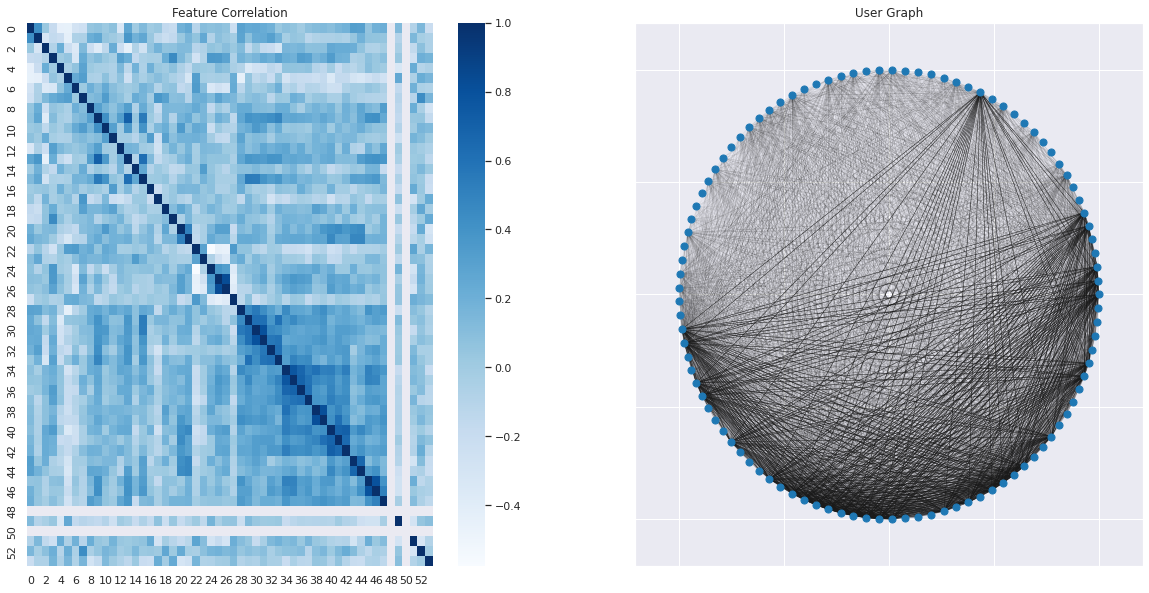

In [5]:
%%capture --no-display
fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Heatmap
plt.sca(axs[0])
sns.heatmap(np.corrcoef(np.transpose(numeric_results)), cmap="Blues", annot=False)
plt.title('Feature Correlation')

# User Graph
plt.sca(axs[1])
# Generate graph
G = nx.Graph()
G_edges = pdist(numeric_results)
G_edges /= G_edges.max()
G_edges = 2 * (1 / (1 + G_edges)) - 1
G_edges /= G_edges.max()
G_edges = squareform(G_edges)
G.add_nodes_from(range(G_edges.shape[0]))
for i in range(G_edges.shape[0]):
    for j in range(i+1, G_edges.shape[0]):
        weight = G_edges[i, j]
        G.add_edge(i, j, weight=weight)
# Plot
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50)
# Alpha workaround (can't take list)
for edge in G.edges.data():
    edgelist = [edge[:2]]
    weight = edge[2]['weight']
    threshold = .3
    if weight > threshold:
        alpha = (weight - threshold) / (1 - threshold)
        nx.draw_networkx_edges(G, pos, edgelist=edgelist, alpha=alpha, width=.5) 
_ = plt.title('User Graph')